In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
# city_data_df.head
# ride_data_df

# Combine the data into a single dataset
pyber_merge_df = pd.merge(ride_data_df, city_data_df, how = "left", on = "city")

# Display the data table for preview
pyber_merge_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
# Obtain the x and y coordinates for each of the three city types
# City Type (Urban, Suburban, Rural)
citytype_group = pyber_merge_df.groupby(["type", "city"])
# citytype_group.head()

In [5]:
urban_df = pyber_merge_df[pyber_merge_df["type"] == "Urban"]
suburban_df = pyber_merge_df[pyber_merge_df["type"] == "Suburban"]
rural_df = pyber_merge_df[pyber_merge_df["type"] == "Rural"]
# urban_df.head

In [6]:
# Total Number of Rides Per City
urban_rides = urban_df.groupby(["city"]).count()["ride_id"]
# urban_rides
suburban_rides = suburban_df.groupby(["city"]).count()["ride_id"]
rural_rides = rural_df.groupby(["city"]).count()["ride_id"]

In [7]:
# Average Fare ($) Per City
urban_avgfare = urban_df.groupby(["city"]).mean()["fare"]
suburban_avgfare = suburban_df.groupby(["city"]).mean()["fare"]
rural_avgfare = rural_df.groupby(["city"]).mean()["fare"]

In [9]:
#Total Number of Drivers Per City
urban_drivers = city_data_df[city_data_df["type"] == "Urban"]
urban_driverspercity = urban_drivers.groupby(["city"]).sum()["driver_count"]
suburban_drivers = city_data_df[city_data_df["type"] == "Suburban"]
suburban_driverspercity = suburban_drivers.groupby(["city"]).sum()["driver_count"]
rural_drivers = city_data_df[city_data_df["type"] == "Rural"]
rural_driverspercity = rural_drivers.groupby(["city"]).sum()["driver_count"]
# urban_driverspercity
# suburban_driverspercity
rural_driverspercity

city
Bradshawfurt         7
Garzaport            7
Harringtonfort       4
Jessicaport          1
Lake Jamie           4
Lake Latoyabury      2
Michaelberg          6
New Ryantown         2
Newtonview           1
North Holly          8
North Jaime          1
Penaborough          6
Randallchester       9
South Jennifer       7
South Marychester    1
South Saramouth      7
Taylorhaven          1
West Heather         4
Name: driver_count, dtype: int64

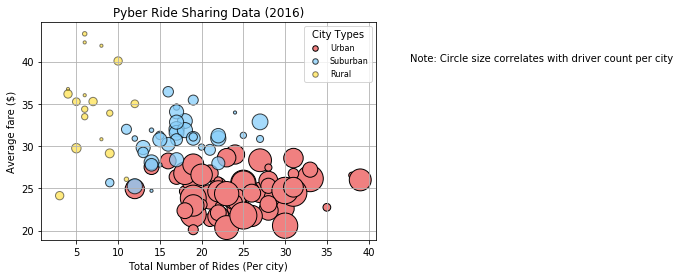

In [10]:
plt.scatter(urban_rides, urban_avgfare, marker="o", c="lightcoral", edgecolors="black", alpha=1.0, s=urban_driverspercity*10,label="Urban")
#Create scatter plot for suburban rides and avg fares
plt.scatter(suburban_rides, suburban_avgfare, marker="o", c="lightskyblue", edgecolors="black", alpha=0.75, s=suburban_driverspercity*10, label="Suburban")
#Create scatter plot for rural rides and avg fares
plt.scatter(rural_rides, rural_avgfare, marker="o", c="gold", edgecolors="black", alpha=0.5, s=rural_driverspercity*10, label="Rural")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per city)")
plt.ylabel("Average fare ($)")

# Create a legend
lgnd = plt.legend(title="City Types", fontsize=8)
plt.grid(True)
plt.text(45,40,"Note: Circle size correlates with driver count per city", fontdict=None, withdash=False)
# Change the marker size manually
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

In [93]:

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [33]:
# Show plot
plt.show()

## Total Fares by City Type

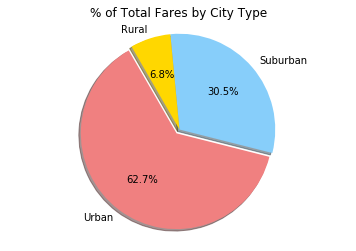

<Figure size 432x288 with 0 Axes>

In [157]:
# Calculate Type Percents
urban_total_fare = urban_df.sum()["fare"]
suburban_total_fare = suburban_df.sum()["fare"]
rural_total_fare = rural_df.sum()["fare"]
# print(total_fare)
# print(urban_total_fare)
# print(suburban_total_fare)

# Define variables for the chart
types = ["Urban", "Suburban", "Rural"]
fare_type = [urban_total_fare, suburban_total_fare, rural_total_fare] 
# print(fare_type)
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.05, 0, 0)

# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(fare_type, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")

# Save Figure
plt.show()
plt.savefig("TotalFareByCity.png")

In [158]:
# Show Figure
plt.show()

## Total Rides by City Type

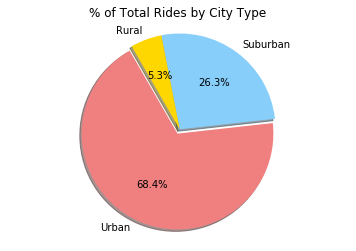

<Figure size 432x288 with 0 Axes>

In [151]:
# Calculate Ride Percents
urban_total_rides = urban_df.count()["ride_id"]
suburban_total_rides = suburban_df.count()["ride_id"]
rural_total_rides = rural_df.count()["ride_id"]

#Define the variables for the chart
types = ["Urban", "Suburban", "Rural"]
rides_type = [urban_total_rides, suburban_total_rides, rural_total_rides] 
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.05, 0, 0)

# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(rides_type, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")

# Save Figure
plt.show()
plt.savefig("TotalRidesByCity.png")

In [152]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [153]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [154]:
# Calculate Driver Percents
total_drivers = city_data_df.groupby(["type"]).sum()
total_drivers

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


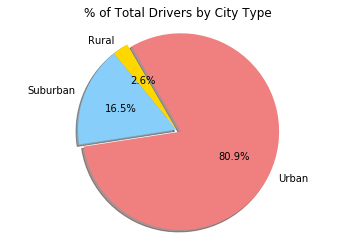

<Figure size 432x288 with 0 Axes>

In [155]:
#Define the variables for the chart
types = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.0, 0, 0.05)

# Build Pie Charts
plt.title("% of Total Drivers by City Type")
plt.pie(total_drivers, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")

# Save Figure
plt.show()
plt.savefig("TotalDriversByCity.png")

In [156]:
# Show Figure
plt.show()